# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">POLYCYSTIC OVARY SYNDROME (PCOS): DIAGNOSIS</p>

**<span style="color:teal;"> Polycystic Ovary Syndrome (PCOS) </span>** Polycystic Ovary Syndrome (PCOS) is a health problem that affects women of childbearing age. Women with PCOS have a hormonal imbalance and metabolism problems that may affect their overall health.

# <p style="background-color:teal;font-family:newtimeroman;color:white;text-align:center;font-size:120%;border-radius:20px 60px;">Table Of Contents</p>

* **Importing Library**
* **Loading data**
* **Data Preprocessing**
* **Data Visualization**
* **Model Building**
  

# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Importing Libraries</p>


In [1]:
#Importing all the libraries that I use in this project
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Loading Data</p>
 
 **About the data:**

* This dataset contains all physical and clinical parameters to determine PCOS and infertility related issues. There are a total of 44 parameters. 

* This data is collected from 10 different hospitals across Kerala, India.

* The unit used is feet to cm

* Blood pressure entered as systolic and diastolic separately

* RBS means Random glucose test

* Beta-HCG cases are mentioned as Case I and II

* Blood Group indications: A+ = 11, A- = 12, B+ = 13, B- = 14, O+ =15, O- = 16, AB+ =17, AB- = 18


In [3]:
#Loding data into the kernels 

file_path_with_infertility="PCOS_infertility.csv"
file_path_without_infertility="PCOS_data_without_infertility.xlsx"

PCOS_inf = pd.read_csv(file_path_with_infertility)
PCOS_woinf = pd.read_excel(file_path_without_infertility, sheet_name="Full_new")

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Data Preprocessing</p>

**Steps involved in Data Preprocessing:**

* Merging the two files that are sorted into two based on patients with infertility and without infertility

* Dropping the repeated features
 
* Encoding categorical variables (dtype objects)

* Dealing with missing values 


**<span style="color:teal;"> Merging the two files as per patient file no. and dropping the repeated features</span>**

In [4]:
#Merging the two files as per patient file no. 
#The files were sorted into two based on patients with infertility and without infertility
data = pd.merge(PCOS_woinf,PCOS_inf, on='Patient File No.', suffixes=('','_y'),how='left')

#Dropping the repeated features after merging
data =data.drop(['Unnamed: 44', 'Sl. No_y', 'PCOS (Y/N)_y', '  I   beta-HCG(mIU/mL)_y',
       'II    beta-HCG(mIU/mL)_y', 'AMH(ng/mL)_y'], axis=1)

#Taking a look at the dataset
data.head() 

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


Everything looks alright we can work with this.

We have a dataset of shape 5 rows × 44 columns.

Let's head up to the next step and have a further look at the data.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

**<span style="color:teal;"> Encoding categorical variables (dtype objects)</span>**

In [6]:
#Having a look at the data with dtype objects

data["AMH(ng/mL)"].head() 

0    2.07
1    1.53
2    6.63
3    1.22
4    2.26
Name: AMH(ng/mL), dtype: object

In [7]:
#Similarly

data["II    beta-HCG(mIU/mL)"].head()

0      1.99
1      1.99
2    494.08
3      1.99
4    801.45
Name: II    beta-HCG(mIU/mL), dtype: object

After having a look at this info we may conclude that:

* Some numeric data are saved as strings.
* There are some missing values. Namely, Marriage Status (Yrs)& Fast food (Y/N)

In [8]:
#Dealing with categorical values.
#In this database the type objects are numeric values saved as strings.
#So I am just converting it into a numeric value.

data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')

#Dealing with missing values. 
#Filling NA values with the median of that feature.

data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
data['II    beta-HCG(mIU/mL)'].fillna(data['II    beta-HCG(mIU/mL)'].median(),inplace=True)
data['AMH(ng/mL)'].fillna(data['AMH(ng/mL)'].median(),inplace=True)
data['Fast food (Y/N)'].fillna(data['Fast food (Y/N)'].median(),inplace=True)

#Clearing up the extra space in the column names (optional)

data.columns = [col.strip() for col in data.columns]

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/1758435866.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Marraige Status (Yrs)'].fillna(data['Marraige Status (Yrs)'].median(),inplace=True)
/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/1758435866.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Exploratory Data Analysis</p>


**Steps involved in EDA**
* Feature selection based on the correlation factor 
* Patterns Of Length Of The Menstrual Cycle
* Patterns Of BMI 
* Patterns Of Irregularity In Mensuration 
* Number of Follicles
* Some Miscellaneous EDA


**<span style="color:teal;"> Let's explore features </span>**

In [9]:
# Having a look at some basic statistical details.

data.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.515712,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500216,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [10]:
#Added in the recent update. 
#This came upon evaluating the dataset some obvious outliers I am not explaining the process I used. 
#Dropping the outliers. 

data = data[(data["BP _Diastolic (mmHg)"]>20)]
data = data[(data["AMH(ng/mL)"]<40)]
data = data[(data["BP _Systolic (mmHg)"]>20)]
data = data[(data["Endometrium (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["Avg. F size (R) (mm)"]>0)]
data = data[(data["RBS(mg/dl)"]<200)]
data = data[(data["PRG(ng/mL)"]<20)]
data = data[(data["Pulse rate(bpm)"]>20)]
data = data[(data["FSH(mIU/mL)"]<4000)]
data = data[(data["LH(mIU/mL)"]<1500)]
data = data[(data["Cycle(R/I)"]<4.5)]

data.shape

(526, 44)

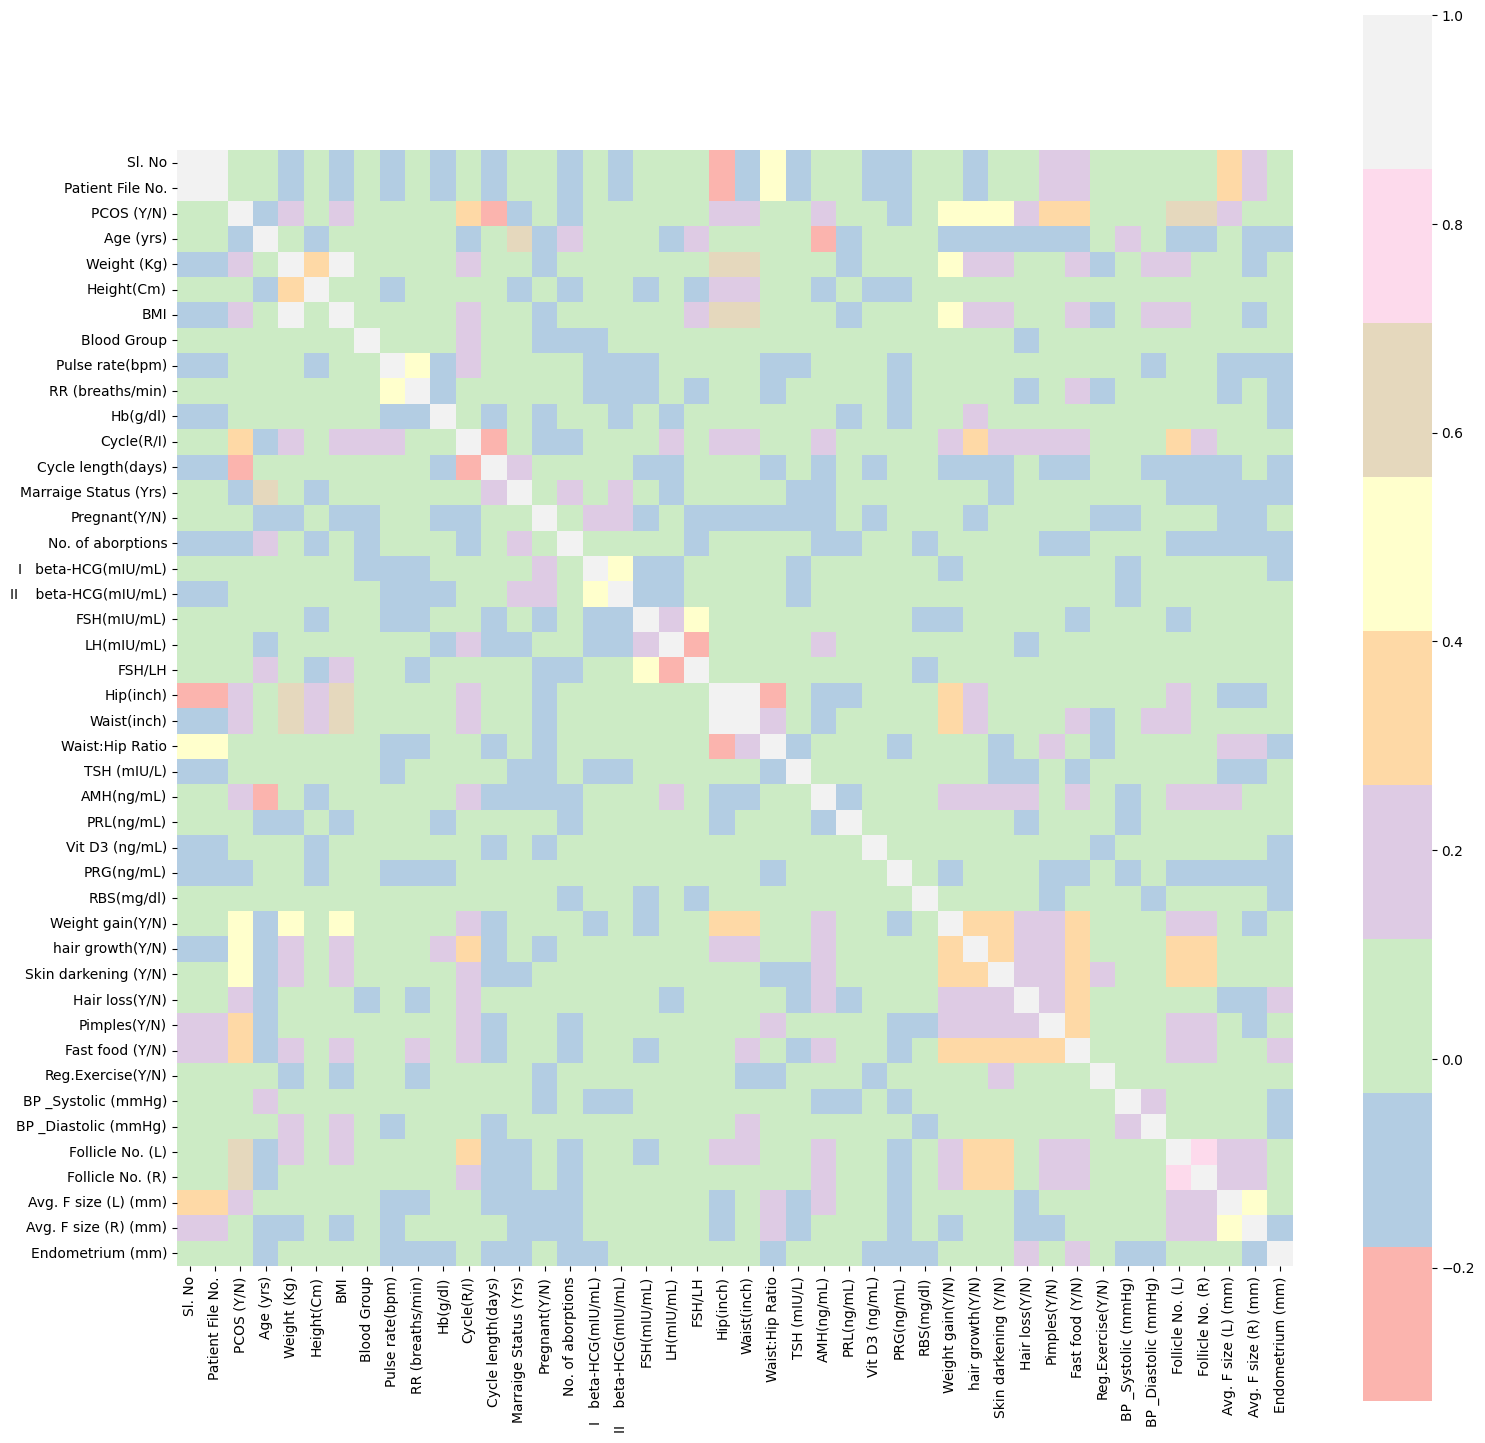

In [11]:
#Examaning a correlation matrix of all the features 

corrmat = data.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

In [12]:
#How all the features correlate with the PCOS 

corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)                1.000000
Follicle No. (R)          0.650915
Follicle No. (L)          0.605305
Skin darkening (Y/N)      0.474561
hair growth(Y/N)          0.463557
Weight gain(Y/N)          0.445646
Cycle(R/I)                0.404082
Fast food (Y/N)           0.376877
Pimples(Y/N)              0.295313
AMH(ng/mL)                0.261105
Weight (Kg)               0.210241
BMI                       0.194121
Hair loss(Y/N)            0.176603
Hip(inch)                 0.163335
Waist(inch)               0.160226
Avg. F size (L) (mm)      0.124990
Pulse rate(bpm)           0.102988
LH(mIU/mL)                0.095426
Hb(g/dl)                  0.094481
Vit D3 (ng/mL)            0.086052
Endometrium (mm)          0.085608
Avg. F size (R) (mm)      0.084756
Height(Cm)                0.075431
Reg.Exercise(Y/N)         0.061816
Sl. No                    0.051936
Patient File No.          0.051936
FSH/LH                    0.043591
Blood Group               0.043032
RR (breaths/min)    

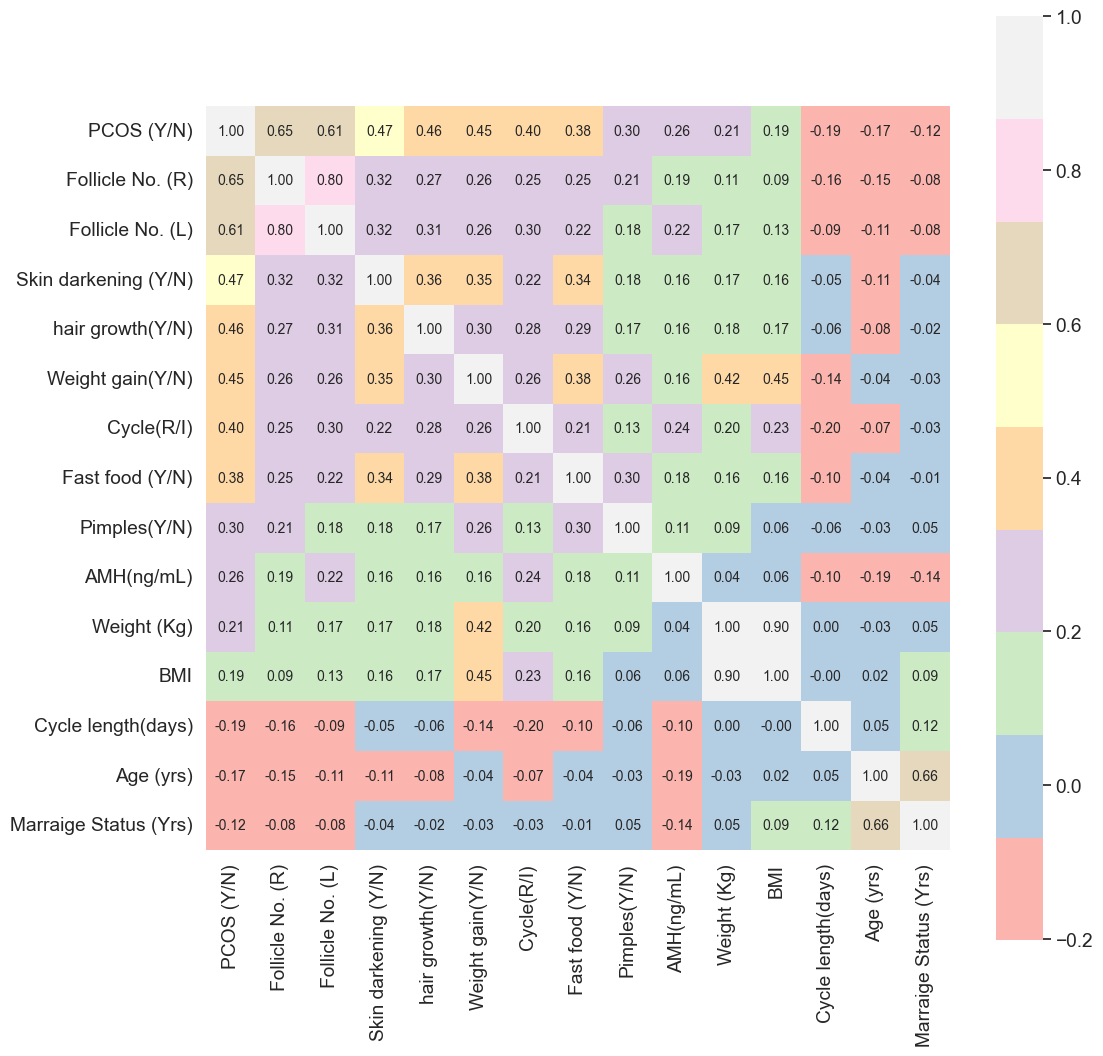

In [13]:
#Having a look at features bearing significant correlation

plt.figure(figsize=(12,12))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

 **<span style="color:teal;"> Patterns Of Length Of The Menstrual Cycle </span>**

/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: divide by zero encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: overflow encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: invalid value encountered in dot
  yhat_boots = grid.dot(beta_boots).T


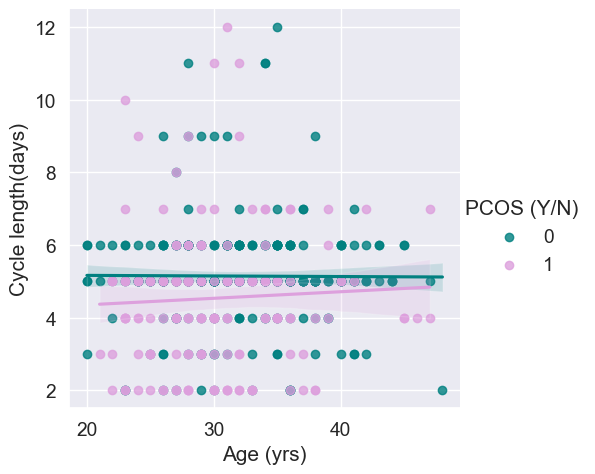

In [14]:
# Length of menstrual phase in PCOS vs normal 
color = ["teal", "plum"]
fig=sns.lmplot(data=data,x="Age (yrs)",y="Cycle length(days)", hue="PCOS (Y/N)",palette=color)
plt.show(fig)

The length of the menstrual phase is overall consistent over different ages for normal cases. Whereas in the case of PCOD the length increased with age. 

 **<span style="color:teal;"> Patterns Of BMI </span>**

/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: divide by zero encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: overflow encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: invalid value encountered in dot
  yhat_boots = grid.dot(beta_boots).T


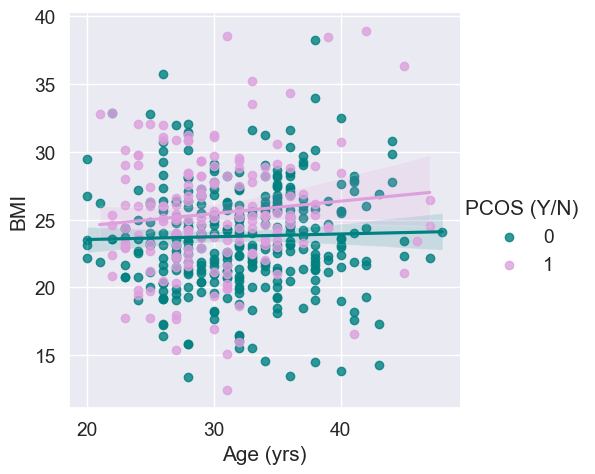

In [15]:
# Pattern of weight gain (BMI) over years in PCOS and Normal. 
fig= sns.lmplot(data =data,x="Age (yrs)",y="BMI", hue="PCOS (Y/N)", palette= color )
plt.show(fig)

Body mass index (BMI) is showing consistency for normal cases. Whereas for PCOS the BMI increases with age.

 **<span style="color:teal;"> Patterns Of Irregularity In Mensuration  </span>**

*There is no clarity on what this feature and its values indicate but, *

**Apparently in the feature "Cycle(R/I)" value:**

**4** indicates irregular menstrual cycle 

**2** indicates a regular menstrual cycle

/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: divide by zero encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: overflow encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: invalid value encountered in dot
  yhat_boots = grid.dot(beta_boots).T


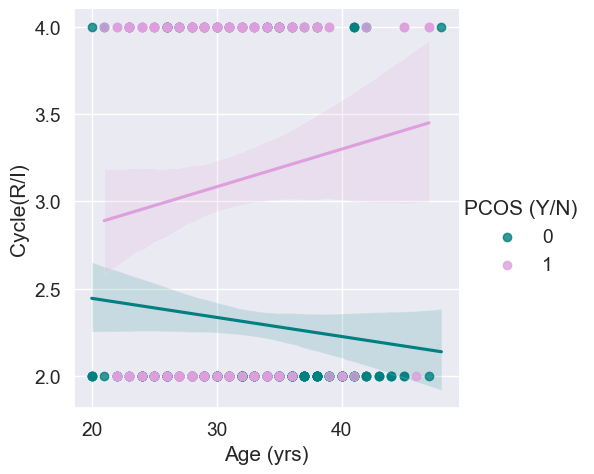

In [16]:
# cycle IR wrt age 
sns.lmplot(data =data,x="Age (yrs)",y="Cycle(R/I)", hue="PCOS (Y/N)",palette=color)
plt.show()

The mensural cycle becomes more regular for normal cases with age. Whereas, for PCOS the irregularity increases with age.

 **<span style="color:teal;"> Number Of Follicles </span>**

/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: divide by zero encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: overflow encountered in dot
  yhat_boots = grid.dot(beta_boots).T
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/regression.py:255: RuntimeWarning: invalid value encountered in dot
  yhat_boots = grid.dot(beta_boots).T


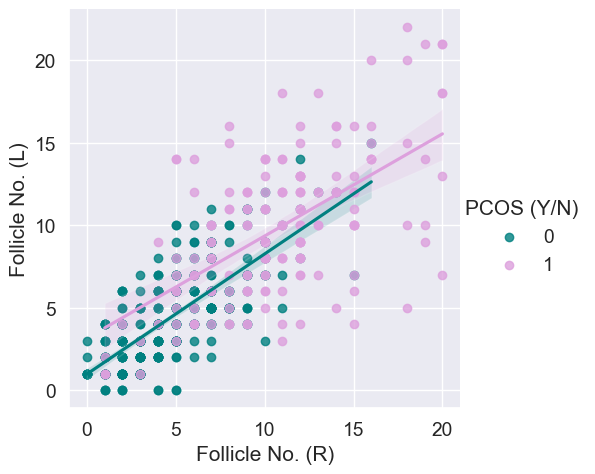

In [17]:
# Distribution of follicles in both ovaries. 
sns.lmplot(data =data,x='Follicle No. (R)',y='Follicle No. (L)', hue="PCOS (Y/N)",palette=color)
plt.show()

The distribution of follicles in both ovaries Left and Right are not equal for women with PCOS in comparison with the "Normal" patient. 
Thia is curious let's exlore it with boxen plot. 

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/2788341060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


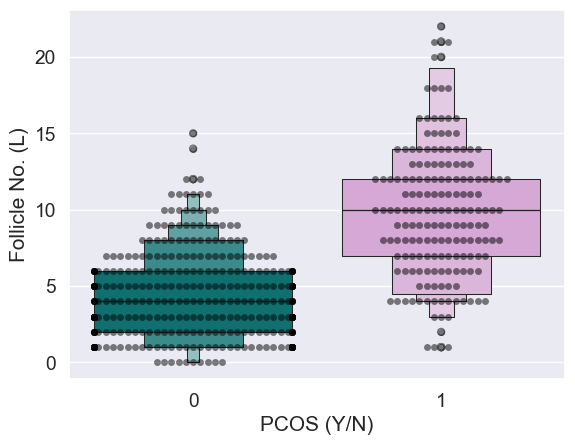

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/2788341060.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 29.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


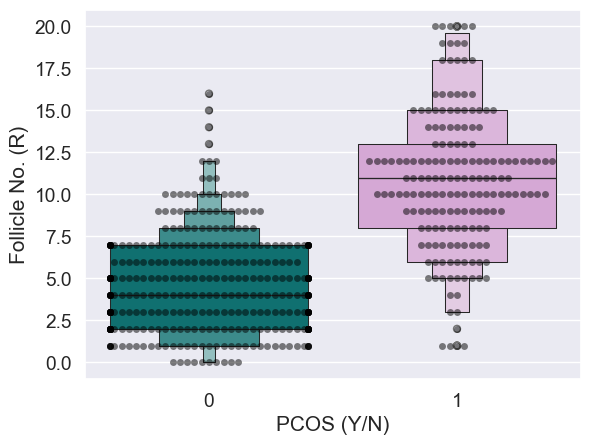

In [18]:
features = ["Follicle No. (L)","Follicle No. (R)"]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

The number of follicles in women with PCOS is higher, as expected. And are unequal as well. 
 
**<span style="color:teal;"> Some Miscellaneous EDA </span>**

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


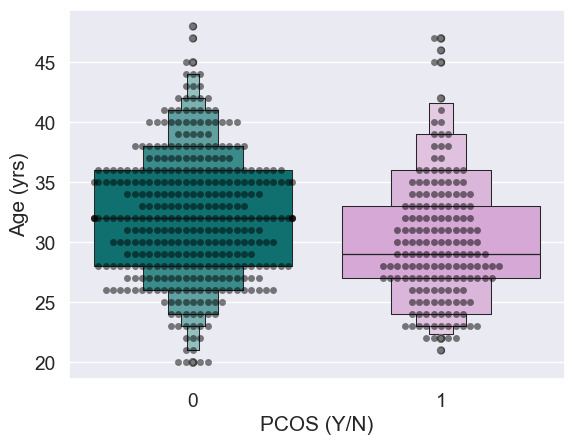

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 7.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


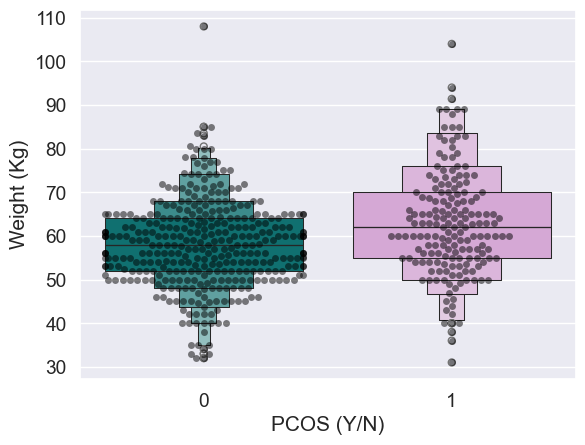

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)


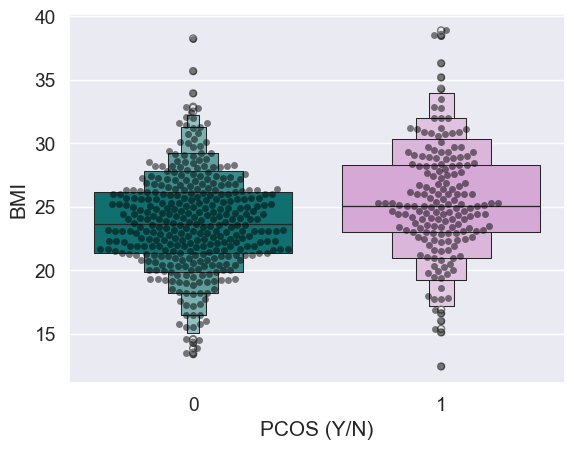

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


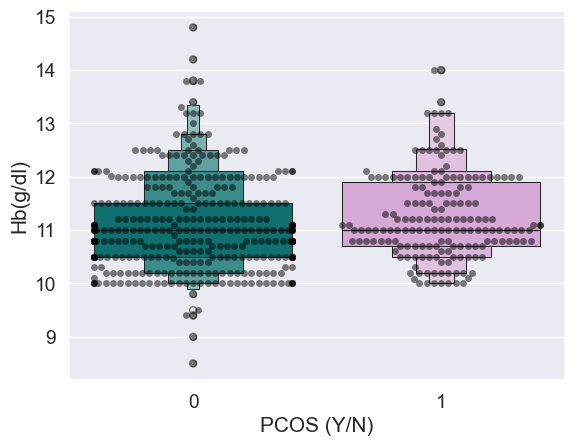

/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 52.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 6.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/Users/prashansa_agarwal@optum.

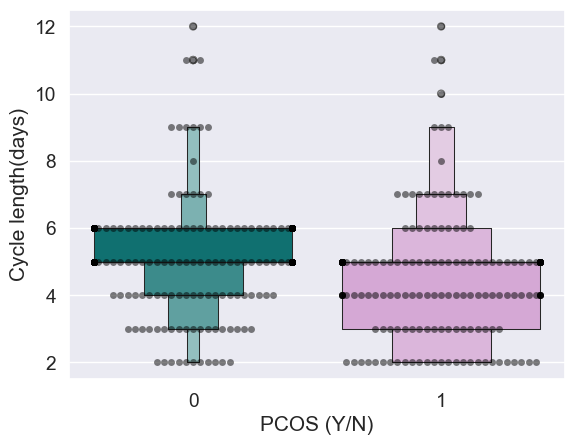

/var/folders/__/1dd61g051vd_k3g1gcdvcwsm0000gp/T/ipykernel_18532/215697658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


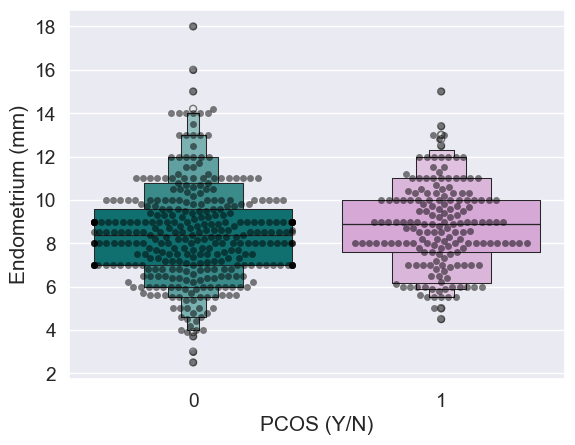

In [19]:
features = ["Age (yrs)","Weight (Kg)", "BMI", "Hb(g/dl)", "Cycle length(days)","Endometrium (mm)" ]
for i in features:
    sns.swarmplot(x=data["PCOS (Y/N)"], y=data[i], color="black", alpha=0.5 )
    sns.boxenplot(x=data["PCOS (Y/N)"], y=data[i], palette=color)
    plt.show()

 # <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">Model Building</p>

**Steps involved in Model Building:**

* Assigning values to features as X and target as y
* Split test and training sets
* Fitting a vanilla model as the base Random Forest model
* Hyperparameter tuning using GridSearch CV
* Fitting the final model 
* Evaluating the confusion matrix
* Evaluating the classification report

In [20]:
#Assiging the features (X)and target(y)

X=data.drop(["PCOS (Y/N)","Sl. No","Patient File No."],axis = 1) #droping out index from features too
y=data["PCOS (Y/N)"]

#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.3) 

 **<span style="color:teal;"> Fitting the Model </span>**
 
Fitting a rather vanilla modle as base model 

In [21]:
#Fitting the RandomForestClassifier to the training set

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.9050632911392406


In [22]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV

parameters = { 
    'n_estimators': [100,150, 200,500,700],
    'max_features': ['sqrt', 'log2', 'None'],
    'max_depth' : [4,5,6,7,8,9,10,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 7)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
1680 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1680 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Track

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'n_jobs': -1}

In [23]:
X_train

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
254,28,52.0,156.000,21.367521,13,72,16,11.2,2,5,...,1,0.0,0,120,70,2,3,15.0,18.0,8.0
461,33,55.0,158.496,21.900000,15,72,22,12.0,2,5,...,0,1.0,0,110,80,0,4,0.0,20.0,8.9
280,31,65.0,158.000,26.037494,15,72,18,12.4,2,5,...,1,0.0,1,120,70,3,3,18.0,15.0,8.9
326,45,54.0,152.000,23.400000,13,72,16,10.6,2,6,...,1,0.0,1,120,80,2,4,10.0,15.0,13.0
365,38,77.9,161.000,30.100000,15,72,24,11.1,2,5,...,1,1.0,0,140,100,2,2,15.0,14.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,28,58.0,164.000,21.600000,13,72,18,11.5,2,6,...,1,1.0,1,110,80,15,12,18.0,20.0,12.0
289,27,65.0,162.000,24.767566,15,72,18,10.7,2,5,...,1,0.0,0,110,80,5,3,16.0,17.0,8.0
73,26,70.0,163.000,26.346494,15,72,18,10.5,2,5,...,0,0.0,0,110,80,3,4,10.5,6.0,9.8
540,23,82.0,165.000,30.100000,13,80,20,10.2,4,7,...,1,1.0,0,120,70,9,10,19.0,18.0,6.9


In [25]:
#Fitting the model with selected parameters

rfc1=RandomForestClassifier(**CV_rfc.best_params_)
rfc1.fit(X_train, y_train)

#Testing the Model on test set

predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

0.8924050632911392

**<span style="color:teal;"> Classification Report & Confusion Matrix </span>**

In [26]:
classi_report = classification_report(y_test, predictions)
print(classi_report)

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       104
           1       0.93      0.74      0.82        54

    accuracy                           0.89       158
   macro avg       0.90      0.86      0.87       158
weighted avg       0.90      0.89      0.89       158



<Axes: >

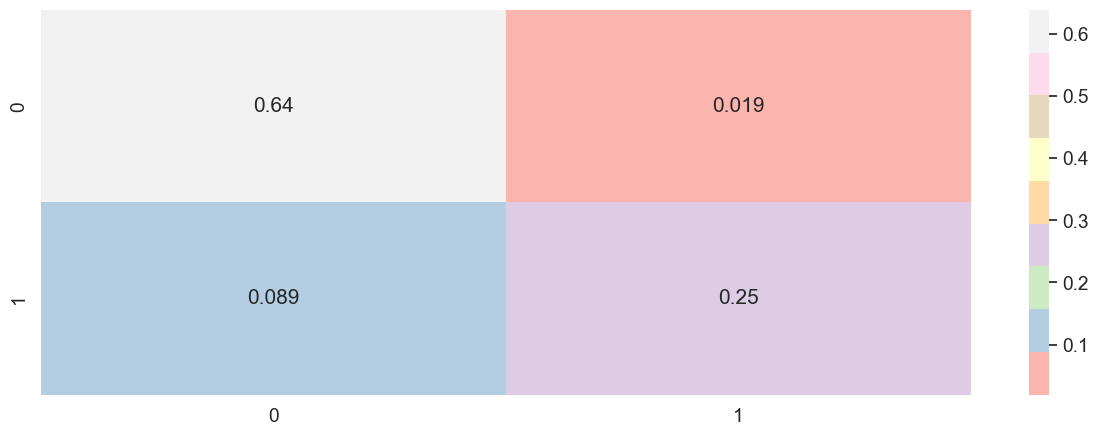

In [27]:
# cofusion matrix
plt.subplots(figsize=(15,5))
cf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot = True, annot_kws = {'size':15}, cmap = 'Pastel1')

In [28]:
import joblib

# Save the best model from GridSearchCV
joblib.dump(rfc1, 'predictor_40.pkl')

print("Model saved as 'predictor_40.pkl'")

Model saved as 'predictor_40.pkl'


**<span style="color:teal;"> If you liked this Notebook, please do upvote.</span>**

**<span style="color:teal;"> If you have any suggestions or questions, I am all ears!</span>**

**<span style="color:teal;">Best Wishes!</span>**

# <p style="background-color:teal;font-family:newtimeroman;color:white;font-size:120%;text-align:center;border-radius:20px 60px;">END</p>

In [29]:
X.columns

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [30]:
#Assiging the features (X)and target(y)

X_new=X[['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Cycle(R/I)',
       'Cycle length(days)', 'Pregnant(Y/N)',
       'No. of aborptions', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)']] #droping out some features
y_new=data["PCOS (Y/N)"]

#Splitting the data into test and training sets

X_train,X_test, y_train, y_test = train_test_split(X_new,y_new, test_size=0.3) 

In [31]:
#Fitting the RandomForestClassifier to the training set

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

#Making prediction and checking the test set

pred_rfc = rfc.predict(X_test)
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.7911392405063291


In [32]:
#Building a dictionalry with list of optional values that will me analyesed by GridSearch CV

parameters = { 
    'n_estimators': [100,150, 200,500,700],
    'max_features': ['sqrt', 'log2', 'None'],
    'max_depth' : [4,5,6,7,8,9,10,12],
    'criterion' :['gini', 'entropy'],
    'n_jobs':[-1,1,None]
}

#Fitting the trainingset to find parameters with best accuracy

CV_rfc = GridSearchCV(estimator=rfc, param_grid=parameters, cv= 7)
CV_rfc.fit(X_train, y_train)

#Getting the outcome of gridsearch

CV_rfc.best_params_

/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
1680 fits failed out of a total of 5040.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1680 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Tracker/myenv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/prashansa_agarwal@optum.com/Library/CloudStorage/OneDrive-UHG/Documents/Study/Django/PCOS-Track

{'criterion': 'entropy',
 'max_depth': 6,
 'max_features': 'log2',
 'n_estimators': 150,
 'n_jobs': -1}

In [33]:
#Fitting the model with selected parameters

rfc1=RandomForestClassifier(**CV_rfc.best_params_)
rfc1.fit(X_train, y_train)

#Testing the Model on test set

predictions=rfc1.predict(X_test)
acccuracy_final = accuracy_score(y_test,predictions)

acccuracy_final

0.7848101265822784

In [34]:
# Save the best model from GridSearchCV
joblib.dump(rfc1, 'predictor_23.pkl')

print("Model saved as 'predictor_23.pkl'")

Model saved as 'predictor_23.pkl'


In [35]:
X_new.columns

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Cycle(R/I)',
       'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions', 'Hip(inch)',
       'Waist(inch)', 'Waist:Hip Ratio', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'],
      dtype='object')

In [42]:
X_new.columns

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Cycle(R/I)',
       'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions', 'Hip(inch)',
       'Waist(inch)', 'Waist:Hip Ratio', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)'],
      dtype='object')

In [37]:
X.columns

Index(['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Blood Group',
       'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)',
       'Cycle length(days)', 'Marraige Status (Yrs)', 'Pregnant(Y/N)',
       'No. of aborptions', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)',
       'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
       'Endometrium (mm)'],
      dtype='object')

In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 526 entries, 0 to 540
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age (yrs)               526 non-null    int64  
 1   Weight (Kg)             526 non-null    float64
 2   Height(Cm)              526 non-null    float64
 3   BMI                     526 non-null    float64
 4   Blood Group             526 non-null    int64  
 5   Pulse rate(bpm)         526 non-null    int64  
 6   RR (breaths/min)        526 non-null    int64  
 7   Hb(g/dl)                526 non-null    float64
 8   Cycle(R/I)              526 non-null    int64  
 9   Cycle length(days)      526 non-null    int64  
 10  Marraige Status (Yrs)   526 non-null    float64
 11  Pregnant(Y/N)           526 non-null    int64  
 12  No. of aborptions       526 non-null    int64  
 13  I   beta-HCG(mIU/mL)    526 non-null    float64
 14  II    beta-HCG(mIU/mL)  526 non-null    float64

In [41]:
# filepath: /path/to/your/django/view.py
import joblib
import numpy as np

# Load the model
model = joblib.load('predictor_23.pkl')

# Example usage: Predicting with the model
def predict(request):
    # Example input data (replace with actual input from request)
    input_data = np.array([[value1, value2, value3, ...]])
    prediction = model.predict(input_data)
    return JsonResponse({'prediction': prediction.tolist()})